In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pickle

from tqdm import tqdm
import os

In [9]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/database.sqlite" "database.sqlite"

In [12]:
from bs4 import BeautifulSoup
con = sqlite3.connect('database.sqlite') 

filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con) 

# Give reviews with Score>3 a positive rating(1), and reviews with a score<3 a negative rating(0).
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
print(final.shape)

#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()



import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
  
  
 # Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

Number of data points in our data (525814, 10)


  0%|          | 0/364171 [00:00<?, ?it/s]

(364173, 10)
(364171, 10)


100%|██████████| 364171/364171 [02:32<00:00, 2382.16it/s]


In [0]:
from bs4 import BeautifulSoup
con = sqlite3.connect('database.sqlite') 

filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con) 

# Give reviews with Score>3 a positive rating(1), and reviews with a score<3 a negative rating(0).
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
print(final.shape)

#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()



import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
  
  
 # Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

Number of data points in our data (525814, 10)


  0%|          | 0/364171 [00:00<?, ?it/s]

(364173, 10)
(364171, 10)


100%|██████████| 364171/364171 [02:31<00:00, 2405.69it/s]


In [14]:
from sklearn.model_selection import train_test_split

preprocessed_reviews=preprocessed_reviews[:100000]
score=final['Score'][:100000]
X_train, X_test, y_train, y_test = train_test_split(preprocessed_reviews, score, test_size=0.33, random_state=42)

print("X_train shape :: ",len(X_train))
print("X_test shape  :: ",len(X_test))
print("X_test shape  :: ",y_train.shape)
print("X_test shape  :: ",y_test.shape)

X_train shape ::  67000
X_test shape  ::  33000
X_test shape  ::  (67000,)
X_test shape  ::  (33000,)


In [15]:
from collections import Counter

words=[i for review in X_train for i in review.split()]
frequency_words=Counter(words)
#frequency_words.sort()

import operator

sorted_x = sorted(frequency_words.items(), key=operator.itemgetter(1))
sorted_x.reverse()
print(len(sorted_x))

desc_words=[i[0] for i in sorted_x]


64483


In [0]:
desc_words=desc_words[:20000]

In [17]:
print(type(desc_words))
print(len(desc_words))

X_train_sentence_in_num=[]
list_text=X_train
for j in tqdm(range(len(list_text))):
  sentence_in_vec=[]
  for i in list_text[j].split():
    if(i in desc_words):
      val=(desc_words.index(i))+1
      sentence_in_vec.append(val)
    else:
      sentence_in_vec.append(0)
  #if(i in desc_words):
  X_train_sentence_in_num.append(sentence_in_vec)


  0%|          | 20/67000 [00:00<06:21, 175.79it/s]

<class 'list'>
20000


100%|██████████| 67000/67000 [04:44<00:00, 235.13it/s]


In [18]:
print(type(desc_words))
print(len(desc_words))

X_test_sentence_in_num=[]
list_text=X_test
for j in tqdm(range(len(list_text))):
  sentence_in_vec=[]
  for i in list_text[j].split():
    if(i in desc_words):
      val=(desc_words.index(i))+1
      sentence_in_vec.append(val)
    else:
      sentence_in_vec.append(0)
  #if(i in desc_words):
  X_test_sentence_in_num.append(sentence_in_vec)


  0%|          | 29/33000 [00:00<02:00, 272.88it/s]

<class 'list'>
20000


100%|██████████| 33000/33000 [02:25<00:00, 226.59it/s]


In [19]:
print(len(X_train_sentence_in_num))
print(len(X_test_sentence_in_num))

67000
33000


In [20]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train_sentence_in_num, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test_sentence_in_num, maxlen=max_review_length)

print(X_train.shape)
#print(X_train[1])

(67000, 600)


# Model 1
* LStm(100)

In [26]:
# create the model
top_words=20000
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 32)           640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 693,301
Trainable params: 693,301
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history =  model.fit(X_train, y_train, nb_epoch=10, batch_size=512  , validation_split=0.2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 53600 samples, validate on 13400 samples
Epoch 1/10
53600/53600 [==============================] - 140s 3ms/step - loss: 0.3632 - acc: 0.8602 - val_loss: 0.3487 - val_acc: 0.8575
Epoch 2/10
53600/53600 [==============================] - 140s 3ms/step - loss: 0.2612 - acc: 0.8862 - val_loss: 0.2530 - val_acc: 0.8933
Epoch 3/10
53600/53600 [==============================] - 141s 3ms/step - loss: 0.1962 - acc: 0.9202 - val_loss: 0.2380 - val_acc: 0.9010
Epoch 4/10
53600/53600 [==============================] - 140s 3ms/step - loss: 0.1543 - acc: 0.9392 - val_loss: 0.2210 - val_acc: 0.9169
Epoch 5/10
53600/53600 [==============================] - 141s 3ms/step - loss: 0.1247 - acc: 0.9539 - val_loss: 0.2290 - val_acc: 0.9070
Epoch 6/10
53600/53600 [==============================] - 140s 3ms/step - loss: 0.1062 - acc: 0.9623 - val_loss: 0.2324 - val_acc: 0.9167
Epoch 7/10
53600/53600 [==============================] - 140s 3ms/step - loss: 0.0894 - acc: 0.9704 - val_loss: 0.2614 - 

In [29]:
history.history.keys()
print(history.history['val_loss'])
print(history.history['val_acc'])
print(history.history['loss'])
print(history.history['acc'])
scores
print("loss : %.2f%%" % (scores[0]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

[0.3487152955603244, 0.2530329608917236, 0.23802739037506615, 0.22096045949565832, 0.22897370456759608, 0.23242721106579053, 0.26141391597576996, 0.26855400616553293, 0.31095292189228, 0.3119151732725884]
[0.8574626866383339, 0.8932835821963069, 0.9010447761549879, 0.9169402986498021, 0.90701492519521, 0.9167164177325234, 0.9181343281802846, 0.914104477434016, 0.9119402983295384, 0.9119402983295384]
[0.36324422638807724, 0.2611873199334785, 0.19617704807822384, 0.15431869440559132, 0.1247030643918621, 0.10623054945646827, 0.08944045839914636, 0.07929462131724428, 0.06928426061548404, 0.06139028950858472]
[0.8602238805614301, 0.8862499998932454, 0.9201865670930094, 0.9391791044420271, 0.9538992538736827, 0.9623320896589934, 0.9704104478323637, 0.9733395520608816, 0.9779664178392781, 0.9808395523099757]
loss : 29.46%
Accuracy: 91.25%


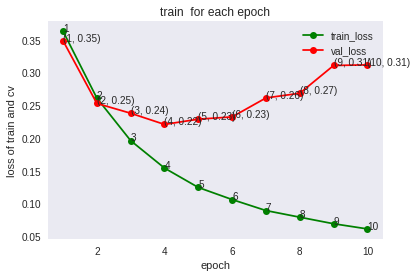

In [36]:
val_loss=[0.3487152955603244, 0.2530329608917236, 0.23802739037506615, 0.22096045949565832, 0.22897370456759608, 0.23242721106579053, 0.26141391597576996, 0.26855400616553293, 0.31095292189228, 0.3119151732725884]
val_acc=[0.8574626866383339, 0.8932835821963069, 0.9010447761549879, 0.9169402986498021, 0.90701492519521, 0.9167164177325234, 0.9181343281802846, 0.914104477434016, 0.9119402983295384, 0.9119402983295384]
train_loss=[0.36324422638807724, 0.2611873199334785, 0.19617704807822384, 0.15431869440559132, 0.1247030643918621, 0.10623054945646827, 0.08944045839914636, 0.07929462131724428, 0.06928426061548404, 0.06139028950858472]
train_acc=[0.8602238805614301, 0.8862499998932454, 0.9201865670930094, 0.9391791044420271, 0.9538992538736827, 0.9623320896589934, 0.9704104478323637, 0.9733395520608816, 0.9779664178392781, 0.9808395523099757]




epoch=list(range(1,11))

fig, ax = plt.subplots()
ax.plot(epoch, train_loss,c='g',marker='o',label="train_loss")

for i, txt in enumerate(epoch):
    ax.annotate(txt, (epoch[i], train_loss[i]))
ax.plot(epoch, val_loss,c='r',marker='o',label="val_loss")

for i, txt in enumerate(epoch):
    ax.annotate((txt,np.round(val_loss[i],2)) , (epoch[i], val_loss[i]))

plt.title("train  for each epoch")
plt.xlabel("epoch")
plt.ylabel("loss of train and cv")
plt.legend()
plt.grid()
plt.show()




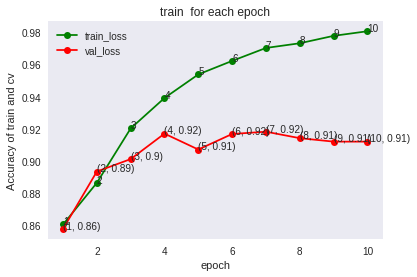

In [37]:

fig, ax1 = plt.subplots()
ax1.plot(epoch, train_acc,c='g',marker='o',label="train_loss")

for i, txt in enumerate(epoch):
    ax1.annotate(txt, (epoch[i], train_acc[i]))
    
ax1.plot(epoch, val_acc,c='r',marker='o',label="val_loss")

for i, txt in enumerate(epoch):
    ax1.annotate((txt,np.round(val_acc[i],2)) , (epoch[i], val_acc[i]))

plt.title("train  for each epoch")
plt.xlabel("epoch")
plt.ylabel("Accuracy of train and cv")
plt.legend()
plt.grid()
plt.show()

# Model 
* LSTM(100) - epoch(10)

In [0]:
history = model.fit(X_train, y_train, nb_epoch=10, batch_size=1024 , validation_split=0.2 )
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 53600 samples, validate on 13400 samples
Epoch 1/10
53600/53600 [==============================] - 144s 3ms/step - loss: 0.2627 - acc: 0.8937 - val_loss: 0.3246 - val_acc: 0.8707
Epoch 2/10
53600/53600 [==============================] - 88s 2ms/step - loss: 0.2392 - acc: 0.8929 - val_loss: 0.2279 - val_acc: 0.9029
Epoch 3/10
53600/53600 [==============================] - 88s 2ms/step - loss: 0.1849 - acc: 0.9227 - val_loss: 0.2050 - val_acc: 0.9119
Epoch 4/10
53600/53600 [==============================] - 88s 2ms/step - loss: 0.1653 - acc: 0.9334 - val_loss: 0.2055 - val_acc: 0.9152
Epoch 5/10
53600/53600 [==============================] - 141s 3ms/step - loss: 0.1502 - acc: 0.9400 - val_loss: 0.2128 - val_acc: 0.9160
Epoch 6/10
53600/53600 [==============================] - 128s 2ms/step - loss: 0.1376 - acc: 0.9452 - val_loss: 0.2159 - val_acc: 0.9137
Epoch 7/10
53600/53600 [==============================] - 151s 3ms/step - loss: 0.1243 - acc: 0.9509 - val_loss: 0.2011 - val

In [0]:
history.history.keys()
print(history.history['val_loss'])
print(history.history['val_acc'])
print(history.history['loss'])
print(history.history['loss'])
scores
print("loss : %.2f%%" % (scores[0]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

[0.32455565870697817, 0.22791154921944462, 0.20499946213480252, 0.20551191191175092, 0.21275373498895275, 0.21594194265443886, 0.2011096647515226, 0.1975470318901005, 0.20219409488919957, 0.21503558000966685]
[0.8707462687278862, 0.9029104477967789, 0.9119402985430476, 0.9152238807037695, 0.9159701492181465, 0.9137313433191669, 0.9240298505683443, 0.92201492519521, 0.9204477610872752, 0.9229850747692051]
[0.26267628030990486, 0.23915745393553778, 0.18494821048494595, 0.16534929706979154, 0.15015576346596676, 0.13758256768112753, 0.12425684476966288, 0.1059092135749646, 0.09482933028420405, 0.08510983836295]
[0.26267628030990486, 0.23915745393553778, 0.18494821048494595, 0.16534929706979154, 0.15015576346596676, 0.13758256768112753, 0.12425684476966288, 0.1059092135749646, 0.09482933028420405, 0.08510983836295]
loss : 25.09%
Accuracy: 91.48%


### plot bewteen loss(train and val) and Epochs

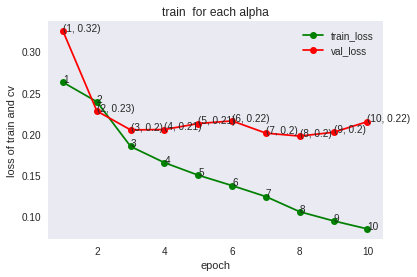

In [5]:
val_loss=[0.32455565870697817, 0.22791154921944462, 0.20499946213480252, 0.20551191191175092, 0.21275373498895275, 0.21594194265443886, 0.2011096647515226, 0.1975470318901005, 0.20219409488919957, 0.21503558000966685]
train_loss=[0.26267628030990486, 0.23915745393553778, 0.18494821048494595, 0.16534929706979154, 0.15015576346596676, 0.13758256768112753, 0.12425684476966288, 0.1059092135749646, 0.09482933028420405, 0.08510983836295]

epoch=list(range(1,11))

fig, ax = plt.subplots()
ax.plot(epoch, train_loss,c='g',marker='o',label="train_loss")

for i, txt in enumerate(epoch):
    ax.annotate(txt, (epoch[i], train_loss[i]))
ax.plot(epoch, val_loss,c='r',marker='o',label="val_loss")

for i, txt in enumerate(epoch):
    ax.annotate((txt,np.round(val_loss[i],2)) , (epoch[i], val_loss[i]))

plt.title("train  for each alpha")
plt.xlabel("epoch")
plt.ylabel("loss of train and cv")
plt.legend()
plt.grid()
plt.show()

# Model 
* LSTM(100) - epoch(20) -BatchSize(1024)

In [38]:
history_epoch20 = model.fit(X_train, y_train, nb_epoch=20, batch_size=1024 , validation_split=0.2 )
# Final evaluation of the model
scores_epoch20 = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores_epoch20[1]*100))

Train on 53600 samples, validate on 13400 samples
Epoch 1/20
53600/53600 [==============================] - 87s 2ms/step - loss: 0.0467 - acc: 0.9872 - val_loss: 0.3305 - val_acc: 0.9124
Epoch 2/20
53600/53600 [==============================] - 87s 2ms/step - loss: 0.0409 - acc: 0.9892 - val_loss: 0.3414 - val_acc: 0.9101
Epoch 3/20
53600/53600 [==============================] - 87s 2ms/step - loss: 0.0367 - acc: 0.9909 - val_loss: 0.3864 - val_acc: 0.9069
Epoch 4/20
53600/53600 [==============================] - 86s 2ms/step - loss: 0.0335 - acc: 0.9918 - val_loss: 0.3909 - val_acc: 0.9078
Epoch 5/20
53600/53600 [==============================] - 86s 2ms/step - loss: 0.0295 - acc: 0.9929 - val_loss: 0.3869 - val_acc: 0.9062
Epoch 6/20
53600/53600 [==============================] - 87s 2ms/step - loss: 0.0329 - acc: 0.9918 - val_loss: 0.3894 - val_acc: 0.9057
Epoch 7/20
53600/53600 [==============================] - 86s 2ms/step - loss: 0.0277 - acc: 0.9932 - val_loss: 0.4083 - val_acc

In [42]:
history_epoch20.history.keys()
print(history_epoch20.history['val_loss'])
print(history_epoch20.history['val_acc'])
print(history_epoch20.history['loss'])
print(history_epoch20.history['acc'])
scores
print("loss : %.2f%%" % (scores[0]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))


[0.33054351805751003, 0.3413731307414041, 0.3864407458056265, 0.39091770511064955, 0.38685415706527765, 0.38943654278321055, 0.4082662701784675, 0.41016663710572826, 0.42824954108515784, 0.4689083670324354, 0.44593090909630506, 0.4343883624984257, 0.5145191513780337, 0.48358026371073365, 0.49675003299072606, 0.47715033251847794, 0.5304994242048975, 0.5136028800615624, 0.5354603843368702, 0.5206351370597954]
[0.9123880595235683, 0.9100746266877473, 0.9068656714638668, 0.9077611938519264, 0.9061940297439917, 0.9057462685499619, 0.9055970147474488, 0.9035820894454842, 0.9058208954156335, 0.904104477434016, 0.9035074625798126, 0.9020149253375495, 0.9032835819827977, 0.9035820894454842, 0.9035820895878237, 0.904552238841555, 0.9028358208599375, 0.9023880597370774, 0.9032089552594654, 0.902611940405262]
[0.04667290706910304, 0.04088750344381403, 0.036674711704254154, 0.03346883856316111, 0.02946827065588823, 0.03291236470550744, 0.02768728069627463, 0.028130231784350836, 0.025270247439395137

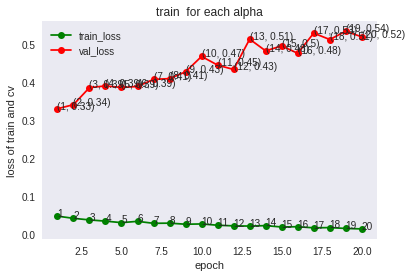

In [44]:
val_loss=[0.33054351805751003, 0.3413731307414041, 0.3864407458056265, 0.39091770511064955, 0.38685415706527765, 0.38943654278321055, 0.4082662701784675, 0.41016663710572826, 0.42824954108515784, 0.4689083670324354, 0.44593090909630506, 0.4343883624984257, 0.5145191513780337, 0.48358026371073365, 0.49675003299072606, 0.47715033251847794, 0.5304994242048975, 0.5136028800615624, 0.5354603843368702, 0.5206351370597954]
val_acc=[0.9123880595235683, 0.9100746266877473, 0.9068656714638668, 0.9077611938519264, 0.9061940297439917, 0.9057462685499619, 0.9055970147474488, 0.9035820894454842, 0.9058208954156335, 0.904104477434016, 0.9035074625798126, 0.9020149253375495, 0.9032835819827977, 0.9035820894454842, 0.9035820895878237, 0.904552238841555, 0.9028358208599375, 0.9023880597370774, 0.9032089552594654, 0.902611940405262]
train_loss=[0.04667290706910304, 0.04088750344381403, 0.036674711704254154, 0.03346883856316111, 0.02946827065588823, 0.03291236470550744, 0.02768728069627463, 0.028130231784350836, 0.025270247439395137, 0.02603105122418101, 0.022641155493737602, 0.020952905507674858, 0.02039257435711907, 0.021593344244383163, 0.017943981433037055, 0.018727007913889725, 0.015746384194926983, 0.016387049886328515, 0.014108134739434541, 0.012886344114624297]
train_acc=[0.9871828357141409, 0.9892164178036932, 0.9908582088128844, 0.9917537313432836, 0.9929291044420271, 0.9917910448117042, 0.9931716416487053, 0.9926492538380979, 0.993936567199764, 0.9933022386280458, 0.9947574626865672, 0.9953917908668518, 0.9954850746268656, 0.9948507462686568, 0.9961567162399861, 0.9954477610161055, 0.9968283582089552, 0.9966231343283583, 0.9972574626865671, 0.9977425371355085]

epoch=list(range(1,21))

fig, ax = plt.subplots()
ax.plot(epoch, train_loss,c='g',marker='o',label="train_loss")

for i, txt in enumerate(epoch):
    ax.annotate(txt, (epoch[i], train_loss[i]))
ax.plot(epoch, val_loss,c='r',marker='o',label="val_loss")

for i, txt in enumerate(epoch):
    ax.annotate((txt,np.round(val_loss[i],2)) , (epoch[i], val_loss[i]))

plt.title("train  for each alpha")
plt.xlabel("epoch")
plt.ylabel("loss of train and cv")
plt.legend()
plt.grid()
plt.show()

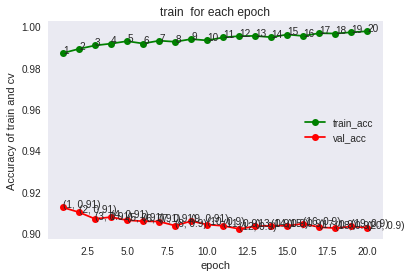

In [46]:

fig, ax1 = plt.subplots()
ax1.plot(epoch, train_acc,c='g',marker='o',label="train_acc")

for i, txt in enumerate(epoch):
    ax1.annotate(txt, (epoch[i], train_acc[i]))
    
ax1.plot(epoch, val_acc,c='r',marker='o',label="val_acc")

for i, txt in enumerate(epoch):
    ax1.annotate((txt,np.round(val_acc[i],2)) , (epoch[i], val_acc[i]))

plt.title("train  for each epoch")
plt.xlabel("epoch")
plt.ylabel("Accuracy of train and cv")
plt.legend()
plt.grid()
plt.show()

# Model 
* LSTM(32) 
* LSTM(32) 
* epoch(20) -BatchSize(1024)

In [0]:
# create the model
top_words=20000
embedding_vecor_length = 32

model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 32)           640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 600, 32)           8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 656,673
Trainable params: 656,673
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history_epoch10_LSTM2 = model.fit(X_train, y_train, nb_epoch=10, batch_size=1024 , validation_split=0.2 )
# Final evaluation of the model
scores_epoch20 = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores_epoch10_LSTM2[1]*100))

Train on 53600 samples, validate on 13400 samples
Epoch 1/10
53600/53600 [==============================] - 151s 3ms/step - loss: 0.4855 - acc: 0.8418 - val_loss: 0.3974 - val_acc: 0.8520
Epoch 2/10
53600/53600 [==============================] - 150s 3ms/step - loss: 0.3296 - acc: 0.8654 - val_loss: 0.2994 - val_acc: 0.8717
Epoch 3/10
53600/53600 [==============================] - 150s 3ms/step - loss: 0.2358 - acc: 0.9032 - val_loss: 0.2549 - val_acc: 0.8956
Epoch 4/10
53600/53600 [==============================] - 206s 4ms/step - loss: 0.1907 - acc: 0.9254 - val_loss: 0.2436 - val_acc: 0.8992
Epoch 5/10
53600/53600 [==============================] - 198s 4ms/step - loss: 0.1570 - acc: 0.9394 - val_loss: 0.2295 - val_acc: 0.9130
Epoch 6/10
53600/53600 [==============================] - 155s 3ms/step - loss: 0.1288 - acc: 0.9530 - val_loss: 0.2374 - val_acc: 0.9142
Epoch 7/10
53600/53600 [==============================] - 154s 3ms/step - loss: 0.1102 - acc: 0.9619 - val_loss: 0.2416 - 

NameError: ignored

In [0]:
scores_epoch10_LSTM2=scores_epoch20
print("Accuracy: %.2f%%" % (scores_epoch20[1]*100))
history_epoch10_LSTM2


history_epoch10_LSTM2.history.keys()
print(history_epoch10_LSTM2.history['val_loss'])
print(history_epoch10_LSTM2.history['val_acc'])
print(history_epoch10_LSTM2.history['loss'])
print(history_epoch10_LSTM2.history['loss'])
scores
print("loss : %.2f%%" % (scores_epoch10_LSTM2[0]*100))
print("Accuracy: %.2f%%" % (scores_epoch10_LSTM2[1]*100))

Accuracy: 91.01%
[0.3974162083241477, 0.29942880187461623, 0.25494988042027206, 0.243599962965766, 0.22954293419620883, 0.2374324997592328, 0.24161165837921314, 0.2604869239365877, 0.27393566471427233, 0.2978505916292988]
[0.8520149253019647, 0.8717164180883721, 0.8955970148186185, 0.8991791044420271, 0.9129850746980354, 0.9141791046199514, 0.9141791042996876, 0.9107462684787921, 0.9123880595235683, 0.908059701314613]
[0.48547945456718333, 0.3295929052758573, 0.2358010243301961, 0.19074283160380462, 0.15698250969844077, 0.1288127305970263, 0.11019236481456614, 0.0958224734486039, 0.08378641776629349, 0.07534008701123408]
[0.48547945456718333, 0.3295929052758573, 0.2358010243301961, 0.19074283160380462, 0.15698250969844077, 0.1288127305970263, 0.11019236481456614, 0.0958224734486039, 0.08378641776629349, 0.07534008701123408]
loss : 28.42%
Accuracy: 91.01%


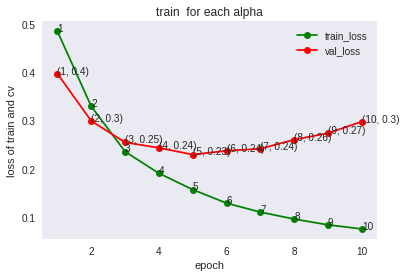

In [8]:
val_loss=[0.3974162083241477, 0.29942880187461623, 0.25494988042027206, 0.243599962965766, 0.22954293419620883, 0.2374324997592328, 0.24161165837921314, 0.2604869239365877, 0.27393566471427233, 0.2978505916292988]
train_loss=[0.48547945456718333, 0.3295929052758573, 0.2358010243301961, 0.19074283160380462, 0.15698250969844077, 0.1288127305970263, 0.11019236481456614, 0.0958224734486039, 0.08378641776629349, 0.07534008701123408]



epoch=list(range(1,11))

fig, ax = plt.subplots()
ax.plot(epoch, train_loss,c='g',marker='o',label="train_loss")

for i, txt in enumerate(epoch):
    ax.annotate(txt, (epoch[i], train_loss[i]))
ax.plot(epoch, val_loss,c='r',marker='o',label="val_loss")

for i, txt in enumerate(epoch):
    ax.annotate((txt,np.round(val_loss[i],2)) , (epoch[i], val_loss[i]))

plt.title("train  for each alpha")
plt.xlabel("epoch")
plt.ylabel("loss of train and cv")
plt.legend()
plt.grid()
plt.show()

# Pretty Table

In [47]:

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["No_Of_Layers", 'LSTM_Units' , 'Epoch', 'Batch_Size' , "Test_acc"]

x.add_row(["1", 100 , 10   , 512  , '91.25%' ])
x.add_row(["1", 100 , 10  , 1024 , '91.48%' ])
x.add_row(["1", 100 , 20 , 1024 , '90.58%' ])
x.add_row(["2", [32,32] , 10 , 1024  , '91.01%' ])



print(x)

+--------------+------------+-------+------------+----------+
| No_Of_Layers | LSTM_Units | Epoch | Batch_Size | Test_acc |
+--------------+------------+-------+------------+----------+
|      1       |    100     |   10  |    512     |  91.25%  |
|      1       |    100     |   10  |    1024    |  91.48%  |
|      1       |    100     |   20  |    1024    |  90.58%  |
|      2       |  [32, 32]  |   10  |    1024    |  91.01%  |
+--------------+------------+-------+------------+----------+


### Summary  :: 
* LSTM -100 , Epoch -10 , Batch-Size -512
    * 
from 1 to  4 epochs val_loss decrease  and from 4 to 9 Epochs val_loss increaing  and from 9 to 10 Epochs val_loss got stable
* LSTM -100 , Epoch -10 , Batch-Size -1024
  * from 1 to  3 epochs val_loss decrease linearlly  and from 3 to 10 Epoch loss got stable
* LSTM -100 , Epoch -20 , Batch-Size -1024
  *  val_loss for epoch 1 to 13 incresing linearly  and then  from 13 to 16 decresing and then agin  from 16 to 20 val_loss increaisng 
* LSTM -32 ,LSTM -32 , Epoch -10 , Batch-Size - 1024
  * from epoch 1 to 5 loss decreased linreally  and from epochs 5 to 10 loss tending to increas